# Spark

Apache Spark — это мощная и гибкая система для обработки больших объемов данных, предлагающая широкий спектр возможностей для аналитики и машинного обучения. 

In [1]:
import os
import socket
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import udf, col, desc, rank, row_number

In [2]:
print('user:', os.environ['JUPYTERHUB_SERVICE_PREFIX'])

def uiWebUrl(self):
    from urllib.parse import urlparse
    web_url = self._jsc.sc().uiWebUrl().get()
    port = urlparse(web_url).port
    return '{}proxy/{}/jobs/'.format(os.environ['JUPYTERHUB_SERVICE_PREFIX'], port)

SparkContext.uiWebUrl = property(uiWebUrl)

conf = SparkConf().set('spark.master', 'local[*]').set('spark.driver.memory', '4g')
sc = SparkContext(conf=conf)
spark = SparkSession(sc)
spark

user: /user/ruslan4ika/


In [3]:
sdf = spark.read.csv(
    'datasets/aggrigation_logs_per_week.csv', 
    sep=',', 
    header=True
)
sdf.printSchema()

root
 |-- courseid: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- num_week: string (nullable = true)
 |-- s_all: string (nullable = true)
 |-- s_all_avg: string (nullable = true)
 |-- s_course_viewed: string (nullable = true)
 |-- s_course_viewed_avg: string (nullable = true)
 |-- s_q_attempt_viewed: string (nullable = true)
 |-- s_q_attempt_viewed_avg: string (nullable = true)
 |-- s_a_course_module_viewed: string (nullable = true)
 |-- s_a_course_module_viewed_avg: string (nullable = true)
 |-- s_a_submission_status_viewed: string (nullable = true)
 |-- s_a_submission_status_viewed_avg: string (nullable = true)
 |-- NameR_Level: string (nullable = true)
 |-- Name_vAtt: string (nullable = true)
 |-- Depart: string (nullable = true)
 |-- Name_OsnO: string (nullable = true)
 |-- Name_FormOPril: string (nullable = true)
 |-- LevelEd: string (nullable = true)
 |-- Num_Sem: string (nullable = true)
 |-- Kurs: string (nullable = true)
 |-- Date_vAtt: string (nullable =

Выведем  первые пять записей из Spark DataFrame

In [4]:
sdf.limit(5).toPandas().head()

,courseid,userid,num_week,s_all,s_all_avg,s_course_viewed,s_course_viewed_avg,s_q_attempt_viewed,s_q_attempt_viewed_avg,s_a_course_module_viewed,...,s_a_submission_status_viewed_avg,NameR_Level,Name_vAtt,Depart,Name_OsnO,Name_FormOPril,LevelEd,Num_Sem,Kurs,Date_vAtt
0,71262,34527,6,9,9,4,4,0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
1,71262,34527,7,0,"4,5",0,2,0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
2,71262,34527,8,0,3,0,"1,3333",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
3,71262,34527,9,0,"2,25",0,1,0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
4,71262,34527,10,0,"1,8",0,"0,8",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022


In [5]:
print('Количество записей в наборе данных:', sdf.count())

Количество записей в наборе данных: 414528


In [6]:
sdf.orderBy('s_course_viewed').limit(5).toPandas()

,courseid,userid,num_week,s_all,s_all_avg,s_course_viewed,s_course_viewed_avg,s_q_attempt_viewed,s_q_attempt_viewed_avg,s_a_course_module_viewed,...,s_a_submission_status_viewed_avg,NameR_Level,Name_vAtt,Depart,Name_OsnO,Name_FormOPril,LevelEd,Num_Sem,Kurs,Date_vAtt
0,84236,33622,25,0,"23,1",0,"4,2",0,"3,05",0,...,"3,75",4,Экзамен,23,1,1,1,2,2,23.06.2022
1,75656,29359,28,0,"0,2174",0,"0,1304",0,0,0,...,"0,0435",2,Экзамен,12,1,1,2,4,3,17.06.2022
2,71262,34527,10,0,"1,8",0,"0,8",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
3,75656,29359,29,0,"0,2083",0,"0,125",0,0,0,...,"0,0417",2,Экзамен,12,1,1,2,4,3,17.06.2022
4,84236,33622,26,0,22,0,4,0,"2,9048",0,...,"3,5714",4,Экзамен,23,1,1,1,2,2,23.06.2022


In [7]:
sdf.select('Name_vAtt').distinct().show()

+---------+
|Name_vAtt|
+---------+
|  Экзамен|
+---------+



Группировка данных, подсчет частоты появления

In [8]:
sdf.groupby('userid').count().show()

+------+-----+
|userid|count|
+------+-----+
| 35444|   72|
| 34657|   96|
| 29089|   48|
| 29573|   48|
| 30966|   24|
| 35350|   96|
| 29539|   72|
| 21783|   72|
| 24269|   72|
| 22121|   48|
|  5613|   48|
| 24528|   48|
| 27492|   48|
| 15539|   24|
| 24078|   24|
| 25350|   48|
| 30054|   24|
| 35438|   72|
| 27753|   72|
| 27563|   96|
+------+-----+
only showing top 20 rows



In [9]:
sdf.groupby('userid').count().sort(col('count').desc()).show()

+------+-----+
|userid|count|
+------+-----+
| 33470|  120|
| 33541|  120|
| 33528|  120|
| 20252|  120|
| 24347|  120|
| 33864|  120|
| 20734|  120|
| 24631|  120|
| 34345|  120|
| 25123|  120|
| 25267|  120|
| 30067|  120|
| 34186|  120|
| 33583|  120|
| 36019|  120|
| 36001|  120|
| 24710|  120|
| 33685|  120|
| 33463|  120|
| 35787|  120|
+------+-----+
only showing top 20 rows



Фильтрация данных

In [10]:
sdf.select(
    'userid',
    'num_week',
    'courseid',
    's_course_viewed'
).filter(
    (col('userid') == '33470') & (col('courseid') == '74257')
).limit(
    30
).toPandas()

,userid,num_week,courseid,s_course_viewed
0,33470,6,74257,5
1,33470,7,74257,0
2,33470,8,74257,12
3,33470,9,74257,4
4,33470,10,74257,0
5,33470,11,74257,14
6,33470,12,74257,5
7,33470,13,74257,5
8,33470,14,74257,2
9,33470,15,74257,8


## Задание 1:
### Анализ активности студентов на портале
Рассчитать общее количество событий (s_all) и просмотров курсов (s_course_viewed) по каждой неделе (num_week).

Примечание. Используйте методы groupBy + agg. 

Проанализируйте полученные данные, какие выводы можно сделать?

In [20]:
sdf.groupBy('num_week').agg(
    F.sum('s_all').alias('total_events'),
    F.sum('s_course_viewed').alias('total_course_views')
).show()

+--------+------------+------------------+
|num_week|total_events|total_course_views|
+--------+------------+------------------+
|       7|    166090.0|           47988.0|
|      15|    178829.0|           39322.0|
|      11|    173100.0|           39493.0|
|      29|       945.0|             308.0|
|       8|    138669.0|           37077.0|
|      22|    388401.0|           72299.0|
|      28|      1554.0|             467.0|
|      16|    177650.0|           38385.0|
|      18|    167044.0|           34461.0|
|      27|     21641.0|            4210.0|
|      17|    181629.0|           37328.0|
|      26|    148590.0|           27531.0|
|       6|    238295.0|           75540.0|
|      19|    191952.0|           40742.0|
|      23|    384501.0|           70501.0|
|      25|    314633.0|           53815.0|
|       9|    162241.0|           40142.0|
|      24|    397465.0|           69962.0|
|      20|    249532.0|           52905.0|
|      10|    141778.0|           33449.0|
+--------+-

## Задание 2.
### Определение самых популярных курсов

Найти топ-5 курсов (courseid) по среднему количеству просмотров (s_course_viewed_avg).


In [22]:
sdf.groupBy('courseid').agg(
    F.avg('s_course_viewed').alias('avg_course_views')
).orderBy(F.desc('avg_course_views')).limit(5).show()

+--------+------------------+
|courseid|  avg_course_views|
+--------+------------------+
|   76419|26.473577235772357|
|   78733|17.930555555555557|
|   78705|16.133333333333333|
|   82552|14.083333333333334|
|   73823| 13.90798611111111|
+--------+------------------+



## Задание 3: 
### Мини-исследование

Определить: имеется ли связь между количеством просмотров студентов отдельных курсов и количеством студентов, изучающих отдельный курс.



<Axes: xlabel='student_count', ylabel='total_views'>

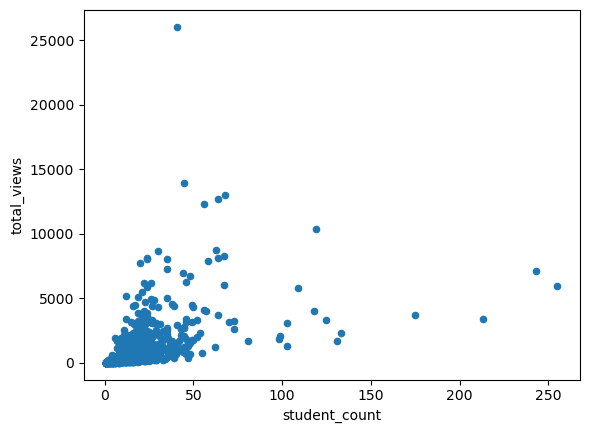

In [23]:
course_stats = sdf.groupBy('courseid').agg(
    F.countDistinct('userid').alias('student_count'),
    F.sum('s_course_viewed').alias('total_views')
)

course_stats.toPandas().plot.scatter(x='student_count', y='total_views')

## Задание 4. 
### Сравнение активности студентов на бюджете и контракте

Найти разницу в среднем количестве всех событий (s_all_avg) между студентами на бюджете и контракте (name_osno). 

Какие выводы можно сделать?



In [24]:
budget_vs_contract = sdf.groupBy('Name_OsnO').agg(
    F.avg('s_all_avg').alias('avg_activity')
)

budget_vs_contract.show()

+---------+------------------+
|Name_OsnO|      avg_activity|
+---------+------------------+
|        1|  8.41703942142887|
|        2|3.4732525769317584|
+---------+------------------+



## Задание 5.
### Исследование зависимости активности студентов от формы обучения

Определить, как форма обучения (name_formopril) влияет на активность студентов (s_all_avg)?



In [26]:
form_activity = sdf.groupBy('Name_FormOPril').agg(
    F.avg('s_all_avg').alias('avg_activity')
)

form_activity.show()

+--------------+------------------+
|Name_FormOPril|      avg_activity|
+--------------+------------------+
|             3|1.2953216374269005|
|             1|11.699871821520128|
|             2|1.2438109107202868|
+--------------+------------------+



## Задание 6. 
### Выявление активности студентов по семестрам

Определить, в каком семестре (num_sem) студенты проявляют наибольшую активность (по s_all_avg).



In [27]:
semester_activity = sdf.groupBy('Num_Sem').agg(
    F.avg('s_all_avg').alias('avg_activity')
).orderBy(F.desc('avg_activity'))

semester_activity.show()

+-------+-------------------+
|Num_Sem|       avg_activity|
+-------+-------------------+
|      2|  9.363531867267612|
|      6|  6.696356437227533|
|      4|  6.216743692230827|
|      8|  3.508361204013378|
|     10|  2.418956814357824|
|     12|0.08901884340480831|
+-------+-------------------+



## Задание 7.
### Определение кафедр с наибольшей активностью студентов

Найти топ-3 кафедры (depart), где студенты наиболее активны (по s_all_avg).



In [28]:
top_departments = sdf.groupBy('Depart').agg(
    F.avg('s_all_avg').alias('avg_activity')
).orderBy(F.desc('avg_activity')).limit(3)

top_departments.show()

+------+------------------+
|Depart|      avg_activity|
+------+------------------+
|     4|26.657972928359193|
|    12|20.158597662771285|
|    14| 15.56260819388344|
+------+------------------+



## Задание 8. 
### Анализ успеваемости студентов в зависимости от активности

Найти среднюю оценку (namer_level) для студентов с разной активностью (s_all_avg).



In [33]:
performance_analysis = sdf.groupBy('s_all_avg').agg(
    F.avg('NameR_Level').alias('avg_level')
).orderBy(F.desc('s_all_avg'))

performance_analysis.show()

+---------+-----------------+
|s_all_avg|        avg_level|
+---------+-----------------+
|  99,9545|4.333333333333333|
|  99,9524|              5.0|
|    99,95|              4.0|
|  99,9412|              4.0|
|  99,9231|              5.0|
|     99,9|              3.5|
|  99,8889|              5.0|
|   99,875|              5.0|
|  99,8261|              4.0|
|  99,8125|              4.0|
|  99,8095|              5.0|
|     99,8|              4.0|
|  99,7917|              4.0|
|  99,7895|              5.0|
|  99,7778|              4.0|
|    99,75|              4.0|
|  99,7273|              5.0|
|     99,7|              5.0|
|  99,6667|              4.5|
|  99,6471|              4.0|
+---------+-----------------+
only showing top 20 rows



## Задание 9.
### Выявление студентов с аномально низкой активностью
Найти студентов с количеством событий (s_all_avg) ниже среднего по курсу (kurs).

Подсказка: Используйте window functions. 
`````
from pyspark.sql.window import Window
from pyspark.sql.functions import mean
`````

In [42]:
from pyspark.sql.window import Window

window_spec = Window.partitionBy('Kurs')
avg_activity_by_kurs = sdf.withColumn(
    'avg_activity_kurs', 
    F.avg('s_all_avg').over(window_spec)
).filter(
    col('s_all_avg') < col('avg_activity_kurs')
)

avg_activity_by_kurs.select('userid', 'Kurs', 's_all_avg', 'avg_activity_kurs').show()

+------+----+---------+-----------------+
|userid|Kurs|s_all_avg|avg_activity_kurs|
+------+----+---------+-----------------+
|  7003|   3|        0|6.216743692230827|
|  7003|   3|        6|6.216743692230827|
| 21718|   3|        0|6.216743692230827|
| 21718|   3|        5|6.216743692230827|
| 21718|   3|        6|6.216743692230827|
| 21718|   3|        5|6.216743692230827|
| 29560|   3|        0|6.216743692230827|
| 29560|   3|        5|6.216743692230827|
| 29560|   3|        5|6.216743692230827|
| 29587|   3|        0|6.216743692230827|
| 29902|   3|        1|6.216743692230827|
| 29902|   3|        1|6.216743692230827|
| 29902|   3|        5|6.216743692230827|
| 29902|   3|        6|6.216743692230827|
| 29919|   3|        0|6.216743692230827|
| 29919|   3|        5|6.216743692230827|
| 29919|   3|        3|6.216743692230827|
| 29986|   3|        0|6.216743692230827|
| 29986|   3|        0|6.216743692230827|
| 30010|   3|        2|6.216743692230827|
+------+----+---------+-----------

## Задание 10.
### Кластеризация студентов по активности 

Разделить студентов на 3 группы (низкая, средняя, высокая активность) с помощью K-Means.

Примечание.  Используйте KMeans из pyspark.ml.clustering. 
Обратите внимание, что по каждому студенту в наборе данных представлены логи, поэтому прежде чем проводить кластеризацию нужно сначала  провести агрегацию данных для каждого студента.

In [36]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# агрегация данных по студентам
student_activity = sdf.groupBy('userid').agg(
    F.avg('s_all_avg').alias('avg_activity'),
    F.avg('s_course_viewed_avg').alias('avg_course_views')
)

# подготовка данных 
assembler = VectorAssembler(
    inputCols=['avg_activity', 'avg_course_views'],
    outputCol='features'
)
data = assembler.transform(student_activity)

# кластеризация
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(data)
clustered = model.transform(data)

clustered.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  178|
|         2| 1368|
|         0| 4770|
+----------+-----+

